In [ ]:
# Instalamos la API del Banco Mundial
!pip install wbgapi

In [ ]:
# Importamos librerías
import pandas as pd
import wbgapi as wb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import statsmodels.formula.api as sm 
from scipy.stats import ttest_ind

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importamos librería para ignorar las alertas
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Configuramos y establecemos el tamaño del lienzo para los gráficos
sns.set(rc = {'figure.figsize':(10,10)})

In [ ]:
# Checamos los campos de la base de datos
wb.series.info()

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


In [ ]:
# Se eligen las siguientes variables
# SP.DYN.LE00.IN	Life expectancy at birth, total (years)
# SH.ALC.PCAP.LI Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)
# Con estas variables trataremos de encontrar una relaciòn entre el consumo de alcohol por habitante y la esperanza de vida

In [ ]:
# Extraemos la información que nos ha interesado
df=wb.data.DataFrame(['SP.DYN.LE00.IN', 'SH.ALC.PCAP.LI'], economy='all', skipBlanks=True, time=2018,
                 labels=True, columns='series', numericTimeKeys= True, skipAggs=False  )

In [ ]:
# Revisamos el dataframe
df

,Country,SH.ALC.PCAP.LI,SP.DYN.LE00.IN
economy,,,
ZWE,Zimbabwe,4.670,61.195000
ZMB,Zambia,6.540,63.510000
YEM,"Yemen, Rep.",0.051,66.096000
PSE,West Bank and Gaza,NaN,73.895000
VIR,Virgin Islands (U.S.),NaN,79.519512
...,...,...,...
TUV,Tuvalu,1.520,NaN
KNA,St. Kitts and Nevis,8.940,NaN
NRU,Nauru,3.710,NaN


In [ ]:
# Restablecemos el índice del dataframe
df.reset_index(inplace=True)

In [ ]:
df

,economy,Country,SH.ALC.PCAP.LI,SP.DYN.LE00.IN
0,ZWE,Zimbabwe,4.670,61.195000
1,ZMB,Zambia,6.540,63.510000
2,YEM,"Yemen, Rep.",0.051,66.096000
3,PSE,West Bank and Gaza,NaN,73.895000
4,VIR,Virgin Islands (U.S.),NaN,79.519512
...,...,...,...,...
246,TUV,Tuvalu,1.520,NaN
247,KNA,St. Kitts and Nevis,8.940,NaN
248,NRU,Nauru,3.710,NaN
249,DMA,Dominica,11.180,NaN


In [ ]:
# Renombramos a las columnas
df.columns=["Economia","Pais","Consumo_total_alcohol_per_capita","Esperanza_vida_total"]
df

,Economia,Pais,Consumo_total_alcohol_per_capita,Esperanza_vida_total
0,ZWE,Zimbabwe,4.670,61.195000
1,ZMB,Zambia,6.540,63.510000
2,YEM,"Yemen, Rep.",0.051,66.096000
3,PSE,West Bank and Gaza,NaN,73.895000
4,VIR,Virgin Islands (U.S.),NaN,79.519512
...,...,...,...,...
246,TUV,Tuvalu,1.520,NaN
247,KNA,St. Kitts and Nevis,8.940,NaN
248,NRU,Nauru,3.710,NaN
249,DMA,Dominica,11.180,NaN


In [ ]:
# Revisamos los valores únicos de la variable País
df.Pais.unique()

array(['Zimbabwe', 'Zambia', 'Yemen, Rep.', 'West Bank and Gaza',
       'Virgin Islands (U.S.)', 'Vietnam', 'Venezuela, RB', 'Vanuatu',
       'Uzbekistan', 'Uruguay', 'United States', 'United Kingdom',
       'United Arab Emirates', 'Ukraine', 'Uganda', 'Turkmenistan',
       'Turkey', 'Tunisia', 'Trinidad and Tobago', 'Tonga', 'Togo',
       'Timor-Leste', 'Thailand', 'Tanzania', 'Tajikistan',
       'Syrian Arab Republic', 'Switzerland', 'Sweden', 'Suriname',
       'Sudan', 'St. Vincent and the Grenadines',
       'St. Martin (French part)', 'St. Lucia', 'Sri Lanka', 'Spain',
       'South Sudan', 'South Africa', 'Somalia', 'Solomon Islands',
       'Slovenia', 'Slovak Republic', 'Singapore', 'Sierra Leone',
       'Seychelles', 'Serbia', 'Senegal', 'Saudi Arabia',
       'Sao Tome and Principe', 'Samoa', 'Rwanda', 'Russian Federation',
       'Romania', 'Qatar', 'Puerto Rico', 'Portugal', 'Poland',
       'Philippines', 'Peru', 'Paraguay', 'Papua New Guinea', 'Panama',
       'Pa

In [ ]:
# Revisamos la variable Esperanza de vida
df.Esperanza_vida_total.describe()

count    246.000000
mean      72.415951
std        7.355956
min       52.805000
25%       67.408250
50%       73.618553
75%       77.567329
max       84.934146
Name: Esperanza_vida_total, dtype: float64

In [ ]:
# ¿Cuántos valores perdidos tiene?
sum(df.Esperanza_vida_total.isna())

5

In [ ]:
# Revisamos la variable Consumo total de alcohol per cápita
df.Consumo_total_alcohol_per_capita.describe()

count    235.000000
mean       5.965825
std        3.897764
min        0.003000
25%        2.625000
50%        5.740000
75%        9.065000
max       20.500000
Name: Consumo_total_alcohol_per_capita, dtype: float64

In [ ]:
# ¿Cuántos valores perdidos tiene?
sum(df.Consumo_total_alcohol_per_capita.isna())

16

In [ ]:
# Desechamos las observaciones con NaN de ambas variables para su análisis y checamos si son suficientes datos
df = df.dropna()

In [ ]:
df.describe()
# Podemos observar que tenemos 230 observaciones para el análisis

,Consumo_total_alcohol_per_capita,Esperanza_vida_total
count,230.000000,230.000000
mean,5.937386,72.006025
std,3.891791,7.242903
min,0.003000,52.805000
25%,2.607500,66.727500
50%,5.720000,73.168500
75%,9.032500,76.965367
max,20.500000,84.210976


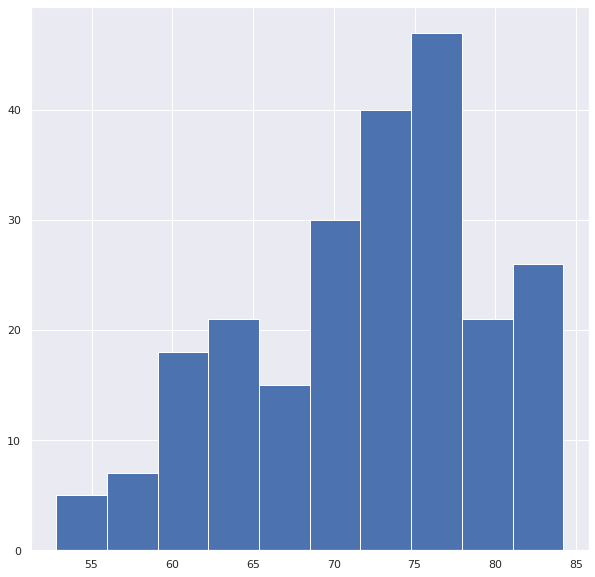

In [ ]:
# Graficamos el histograma de la variable Esperanza de vida
plt.hist(df.Esperanza_vida_total);
# Asemeja a una distribucíon normal. sin embargo, no estamos del todo seguros

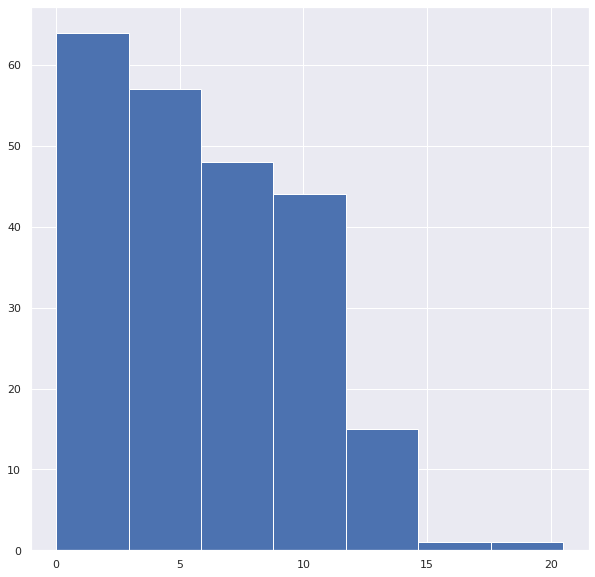

In [ ]:
# Graficamos el histograma de la variable Consumo total de alcohol
plt.hist(df.Consumo_total_alcohol_per_capita,bins=7);
# Sin duda esta variable no tiene una distribucíon normal

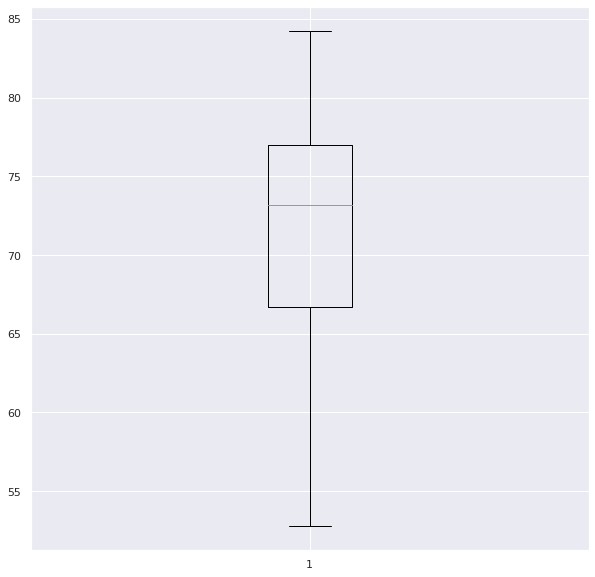

In [ ]:
# Revisamos si existen outliers
plt.boxplot(df.Esperanza_vida_total);
# No existen outliers para la esperanza de vida

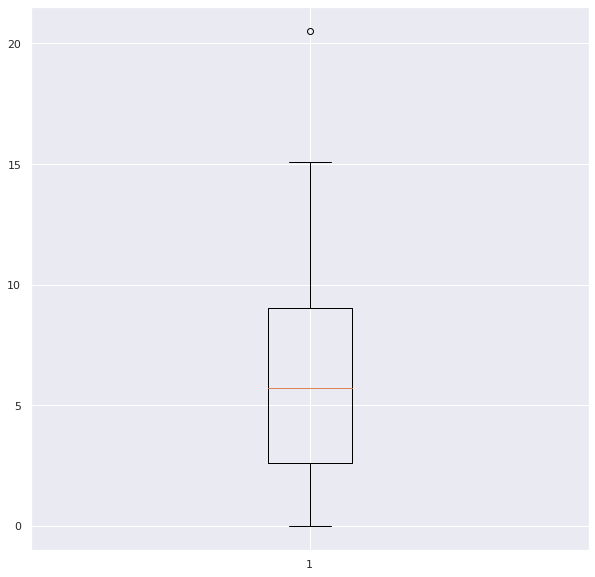

In [ ]:
plt.boxplot(df.Consumo_total_alcohol_per_capita);
# Para el consumo de alcohol existe solo un valor atípico

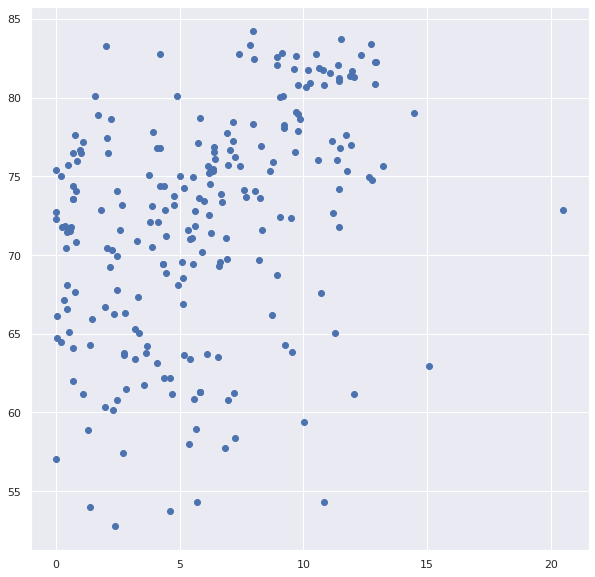

In [ ]:
# Ahora graficaremos un scatter plot de ambas variables
plt.scatter(df.Consumo_total_alcohol_per_capita,df.Esperanza_vida_total);
# A simple vista no podemos determinar si existe una relación entre las variables 

In [ ]:
# Cálculamos la matriz de correlación
cor = df.corr()
cor
# El valor de correlación es relativamente bajo entre las variables, aún así la relación de las variables es positiva

,Consumo_total_alcohol_per_capita,Esperanza_vida_total
Consumo_total_alcohol_per_capita,1.000000,0.382069
Esperanza_vida_total,0.382069,1.000000


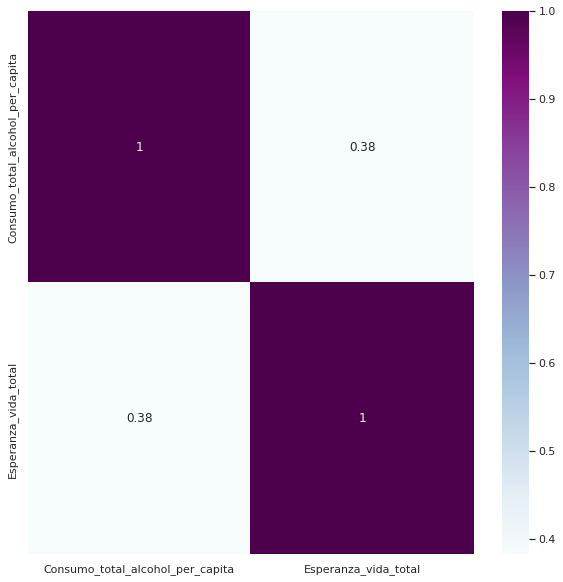

In [ ]:
# Graficamos la matriz de correlación
sns.heatmap(cor, annot=True, cmap='BuPu')

In [ ]:
# Realizamos la regresión lineal con la técnica de mínimos cuadrados ordinarios (OLS)
model = sm.ols(formula = 'Esperanza_vida_total ~ Consumo_total_alcohol_per_capita', data = df).fit()

In [ ]:
# Revisamos los resultados del modelo
results = model.summary()
print(results) 

                             OLS Regression Results                             
Dep. Variable:     Esperanza_vida_total   R-squared:                       0.146
Model:                              OLS   Adj. R-squared:                  0.142
Method:                   Least Squares   F-statistic:                     38.97
Date:                  Thu, 06 Jan 2022   Prob (F-statistic):           2.08e-09
Time:                          03:54:51   Log-Likelihood:                -763.11
No. Observations:                   230   AIC:                             1530.
Df Residuals:                       228   BIC:                             1537.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

La ecuación de nuestra regresión queda de la siguiente manera: Y = 67.7842 + 0.7111*X

Aunque el valor de beta1 no fue igual a cero, sí resulto en un valor muy pequeño.
El valor de bondad de ajuste fue de 0.146 lo que implica que nuestra línea de regresión explica un 14.6 % de la variabilidad de los datos, así que podemos decir que no es un buen modelo, esto también lo podriamos haber supuesto desde que calculamos la matriz de correlación.

Finalmente, se puede decir que al aumentar un litro en el consumo de alcohol per cápita, aumentará 0.7111 años la esperanza de vida de los habitantes de los países.

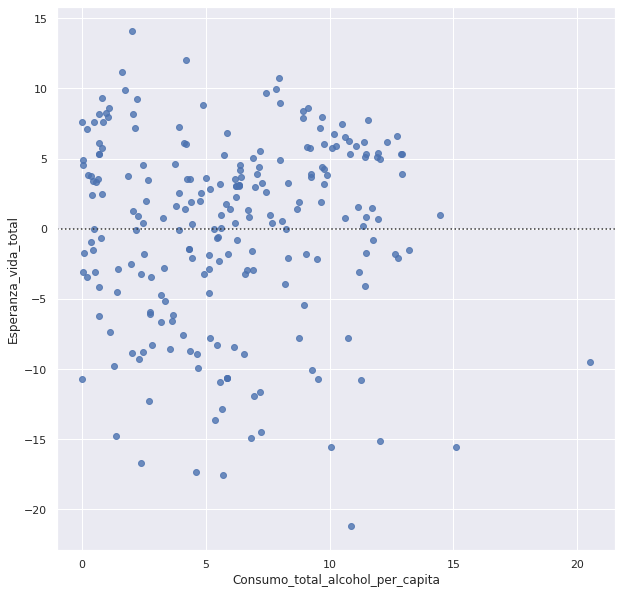

In [ ]:
# Graficamos los residuos después de ajustar el modelo
sns.residplot(x="Consumo_total_alcohol_per_capita", y="Esperanza_vida_total", data=df);
# En cuanto al gráfico de los residuos, podemos observar que no existe homocedasticidad, y esto también es resultado de que la variable
# Consumo de alcohol per cápita no se distribuye normalmente.

CONTRASTE DE HIPÓTESIS

¿La esperanza de vida media de México es igual a la esperanza de vida media de China?

Elegimos un valor de alpha de 0.05 de confianza y aplicamos la prueba

In [ ]:
a = df.loc[df.Pais == "Mexico"]
print(a)
b = df.loc[df.Pais == "China"]
print(b)

   Economia    Pais  Consumo_total_alcohol_per_capita  Esperanza_vida_total
80      MEX  Mexico                               5.0                74.992
    Economia   Pais  Consumo_total_alcohol_per_capita  Esperanza_vida_total
160      CHN  China                              7.05                76.704


In [ ]:
ttest_ind(a = 74.992 ,b = 76.704)

Ttest_indResult(statistic=nan, pvalue=nan)

Hypithesis:

H0: µ1 = µ2 (la media de las dos distribuciones es igual)

HA: µ1 ≠µ2 (La media de las dos distribuciones no es igual)

No se tiene suficiente evidencia para decir que la media de México y China son estadísticamente diferentes.

Cabe mencionar que no pudimos aplicar el t-test, ya que no se tienen más datos sobre la esperanza de vida de ambos países, quizás al agrupar por continente o regiónes, se podría aplicar el t-test.

También es de notarse que se cumple al menos con estos 2 países lo que nos arrojo el modelo de regresión lineal, que a mayor consumo de alcohol per cápita, mayor esperanza de vida.